In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


Bad key savefig.frameon in file /home/bang/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/bang/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/bang/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an update

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


# Filtering Data
**[TODO]** Filter only DataFrame with numeric attribute.

In [3]:
numericDf = df.select_dtypes(include=np.number)
numericDf

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,NaN,37.7,44.6,19.0,26.0,NaN,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0
4,NaN,30.0,NaN,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17.0,21.0,2.5,109.0,4500.0,2915.0,21.1,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0
89,17.6,20.0,22.4,21.0,30.0,2.0,134.0,5800.0,2685.0,18.5,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0
90,22.9,23.3,23.7,18.0,25.0,2.8,178.0,5800.0,2385.0,18.5,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0
91,21.8,22.7,23.5,21.0,28.0,2.3,114.0,5400.0,2215.0,15.8,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0


# Handling Outlier

**[TODO]** Exclude the outlier (cars) with too much expensive.
* Assume that `price` of outlier is greater than `Q3 + (1.5 * IQR)`.

In [5]:
attribute = 'Price'

Q1 = df[attribute].quantile(.25)
Q3 = df[attribute].quantile(.75)

IQR = Q3-Q1

outlier_step = Q3 + 1.5 * IQR


filtered_df = df[df[attribute] < outlier_step]

Draw histogram of `price`.

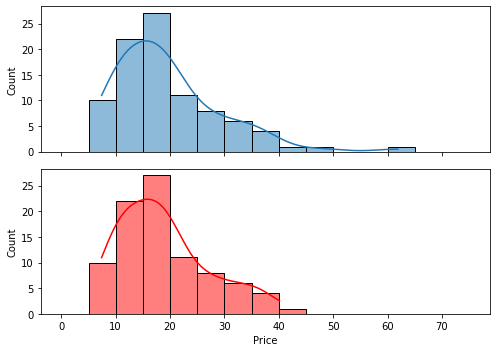

In [6]:
f, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.histplot(data=df, x='Price', ax=axes[0], kde=True,
             bins=np.arange(0,80,5))
sns.histplot(data=filtered_df, x='Price', color='Red',
             ax=axes[1], kde=True, bins=np.arange(0,80,5))
f.tight_layout()

# Hanlding Missing Value

In [7]:
numericDf.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,NaN,37.7,44.6,19.0,26.0,NaN,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0
4,NaN,30.0,NaN,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0


In [8]:
numericDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           86 non-null     float64
 1   Price               91 non-null     float64
 2   Max.Price           88 non-null     float64
 3   MPG.city            84 non-null     float64
 4   MPG.highway         91 non-null     float64
 5   EngineSize          91 non-null     float64
 6   Horsepower          86 non-null     float64
 7   RPM                 90 non-null     float64
 8   Rev.per.mile        87 non-null     float64
 9   Fuel.tank.capacity  85 non-null     float64
 10  Passengers          91 non-null     float64
 11  Length              89 non-null     float64
 12  Wheelbase           92 non-null     float64
 13  Width               87 non-null     float64
 14  Turn.circle         88 non-null     float64
 15  Rear.seat.room      89 non-null     float64
 16  Luggage.ro

**[TODO]** Impute the data with missing value with `SimpleImputer` with `median`.

In [18]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_median.fit(df.select_dtypes(include=np.number))

imputedNumericDf = pd.DataFrame(imp_median.transform(df.select_dtypes(include=np.number)), columns = df.select_dtypes(include=np.number).columns)
imputedNumericDf.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.80,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,14.0,2705.0
1,29.2,33.9,38.70,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.30,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,14.6,37.7,44.60,19.0,26.0,2.3,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,69.0,37.0,31.0,17.0,3405.0
4,14.6,30.0,19.15,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0


In [19]:
imputedNumericDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           93 non-null     float64
 1   Price               93 non-null     float64
 2   Max.Price           93 non-null     float64
 3   MPG.city            93 non-null     float64
 4   MPG.highway         93 non-null     float64
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     float64
 7   RPM                 93 non-null     float64
 8   Rev.per.mile        93 non-null     float64
 9   Fuel.tank.capacity  93 non-null     float64
 10  Passengers          93 non-null     float64
 11  Length              93 non-null     float64
 12  Wheelbase           93 non-null     float64
 13  Width               93 non-null     float64
 14  Turn.circle         93 non-null     float64
 15  Rear.seat.room      93 non-null     float64
 16  Luggage.ro

# Balancing Data

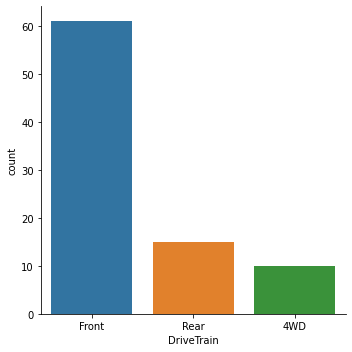

In [20]:
sns.catplot(data=df, kind="count", x='DriveTrain')
f.tight_layout()

**[TODO]** Undersample the `Front` and `Rear` cars as much as `4WD` cars.

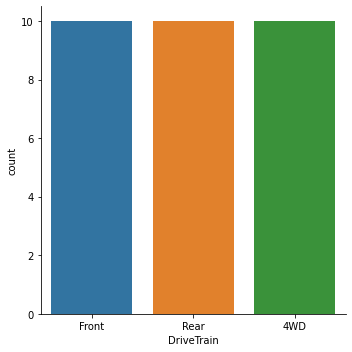

In [30]:
num_0 = sum(df.DriveTrain=='Front')
num_1 = sum(df.DriveTrain=='Rear')
num_2 = sum(df.DriveTrain=='4WD')

# # random undersample
undersampledDf = pd.concat([df[df['DriveTrain']=='Front'].sample(num_2, replace=True),
                           df[df['DriveTrain']=='Rear'].sample(num_2, replace=True),
                           df[df['DriveTrain']=='4WD']])

sns.catplot(data=undersampledDf, kind="count", x='DriveTrain')
f.tight_layout()